We will start working with the CitiBike Data from: https://ride.citibikenyc.com/system-data

The first data set will be for March 2020:

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
# Plotting setup

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20, 20)
matplotlib.style.use(['seaborn-talk', 'seaborn-ticks', 'seaborn-whitegrid'])

In [ ]:
data = pd.read_csv("https://s3.amazonaws.com/tripdata/202003-citibike-tripdata.csv.zip")

In [ ]:
data.head(3)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1589,2020-03-01 00:00:03.6400,2020-03-01 00:26:32.9860,224,Spruce St & Nassau St,40.711464,-74.005524,3574,Prospect Pl & Underhill Ave,40.676969,-73.965790,16214,Subscriber,1980,1
1,389,2020-03-01 00:00:16.7560,2020-03-01 00:06:46.0620,293,Lafayette St & E 8 St,40.730207,-73.991026,223,W 13 St & 7 Ave,40.737815,-73.999947,29994,Subscriber,1991,2
2,614,2020-03-01 00:00:20.0580,2020-03-01 00:10:34.2200,379,W 31 St & 7 Ave,40.749156,-73.991600,515,W 43 St & 10 Ave,40.760094,-73.994618,39853,Subscriber,1991,1


### How many CitiBike Stations are used in this dataset (as either start or end station)

In [ ]:
stations = set(data["start station id"])|set(data["end station id"])

In [ ]:
len(stations)

899

In [ ]:
len(data)

1068457

### Distribution of the ride duration

* Convert seconds into minutes
* Binning

In [ ]:
# mean duration for all the rides
data['tripduration'].mean()

1160.832886115211

In [ ]:
# add a new attribute: trip duration in minutes
data["tripinminutes"] = data["tripduration"]//60

In [ ]:
data.head(3)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,tripinminutes
0,1589,2020-03-01 00:00:03.6400,2020-03-01 00:26:32.9860,224,Spruce St & Nassau St,40.711464,-74.005524,3574,Prospect Pl & Underhill Ave,40.676969,-73.965790,16214,Subscriber,1980,1,26
1,389,2020-03-01 00:00:16.7560,2020-03-01 00:06:46.0620,293,Lafayette St & E 8 St,40.730207,-73.991026,223,W 13 St & 7 Ave,40.737815,-73.999947,29994,Subscriber,1991,2,6
2,614,2020-03-01 00:00:20.0580,2020-03-01 00:10:34.2200,379,W 31 St & 7 Ave,40.749156,-73.991600,515,W 43 St & 10 Ave,40.760094,-73.994618,39853,Subscriber,1991,1,10


In [ ]:
(data.tripduration // 60).value_counts().sort_values()

6278        1
703         1
701         1
6847        1
1721        1
        ...  
3       55993
7       59651
6       63752
4       64014
5       65773
Name: tripduration, Length: 1369, dtype: int64

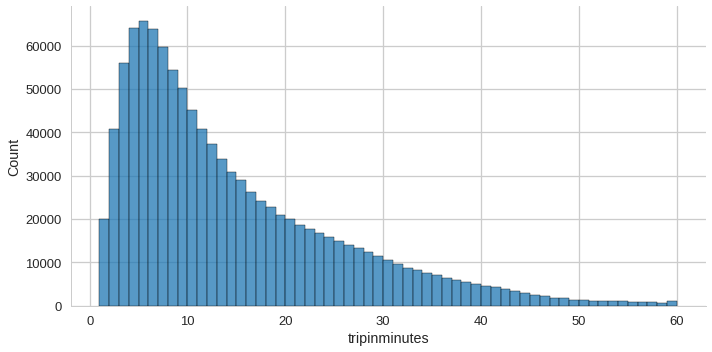

In [ ]:
data['tripminutes'] = data['tripduration'] // 60
sns.displot(data=data,x="tripinminutes", bins=range(1,61), aspect=10/5);

### Distribution of the ride start hour (to confirm that CitiBike is used for work commute)

* Get the start hour


In [ ]:
data.dtypes

tripduration                 int64
starttime                   object
stoptime                    object
start station id             int64
start station name          object
start station latitude     float64
start station longitude    float64
end station id               int64
end station name            object
end station latitude       float64
end station longitude      float64
bikeid                       int64
usertype                    object
birth year                   int64
gender                       int64
tripinminutes                int64
tripminutes                  int64
dtype: object

In [ ]:
data['starttime'] = pd.to_datetime(data['starttime'])
data['stoptime'] = pd.to_datetime(data['stoptime'])

In [ ]:
data['starthour'] = data['starttime'].dt.hour.astype('category')

In [ ]:
data['startday'] = data['starttime'].dt.day.astype('category')
data['weekday'] = data['starttime'].dt.weekday.astype('category')

In [ ]:
data.dtypes

tripduration                        int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start station id                    int64
start station name                 object
start station latitude            float64
start station longitude           float64
end station id                      int64
end station name                   object
end station latitude              float64
end station longitude             float64
bikeid                              int64
usertype                           object
birth year                          int64
gender                              int64
tripinminutes                       int64
tripminutes                         int64
starthour                        category
startday                         category
weekday                          category
dtype: object

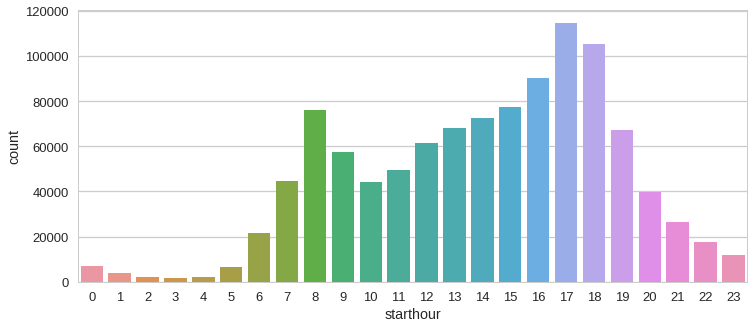

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(data=data, x="starthour")

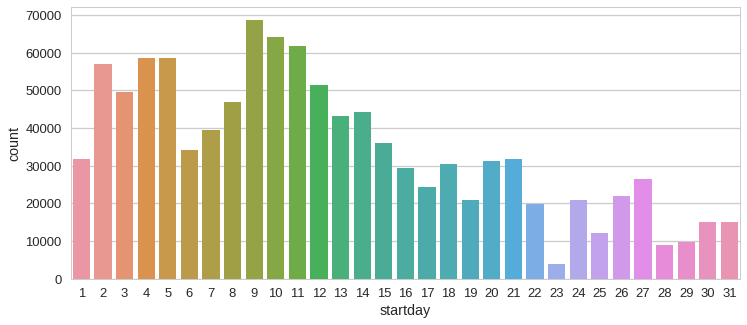

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(data=data, x="startday")

### Todo

we can check the customer by gender/userType/birth year

### Gender distribution

Use pivot tables to see the gender distribution

In [ ]:
print("Unknown\t",len(data[data.gender == 0]))
print("Female\t",len(data[data["gender"] == 2]))
print("Male\t",len(data[data["gender"] == 1]))

Unknown	 81616
Female	 263862
Male	 722979


In [ ]:
data.groupby("gender")["start station id"].count()

gender
0     81616
1    722979
2    263862
Name: start station id, dtype: int64

In [ ]:
table = pd.pivot_table(data = data, index = 'gender', values = 'bikeid', aggfunc= 'count')
table

,bikeid
gender,
0,81616
1,722979
2,263862


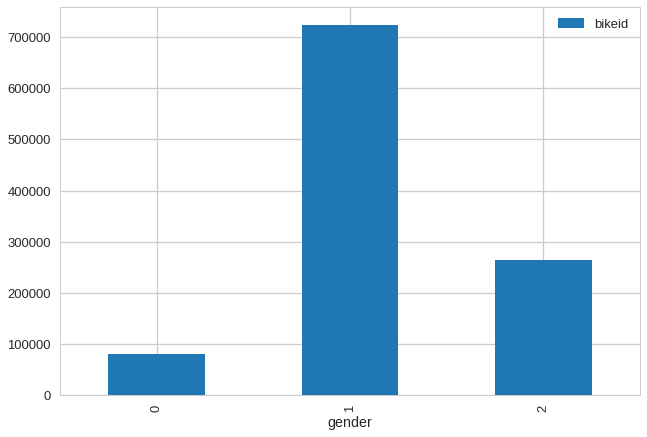

In [ ]:
table.plot(kind='bar')

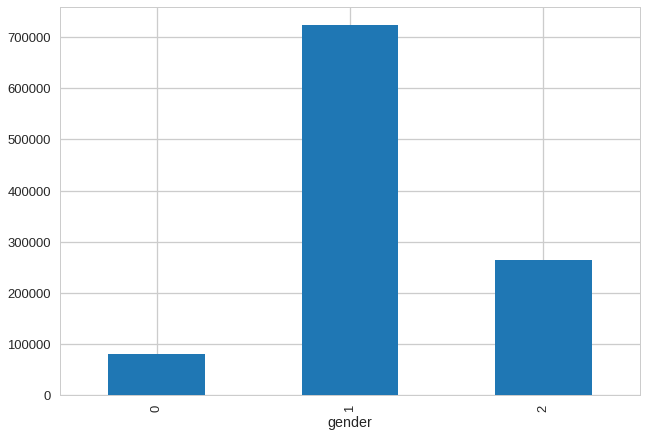

In [ ]:
(data.groupby("gender")["start station id"].count()).plot.bar()

### User type distribution

In [ ]:
data.groupby("usertype")["start station id"].count()

usertype
Customer      154389
Subscriber    914068
Name: start station id, dtype: int64

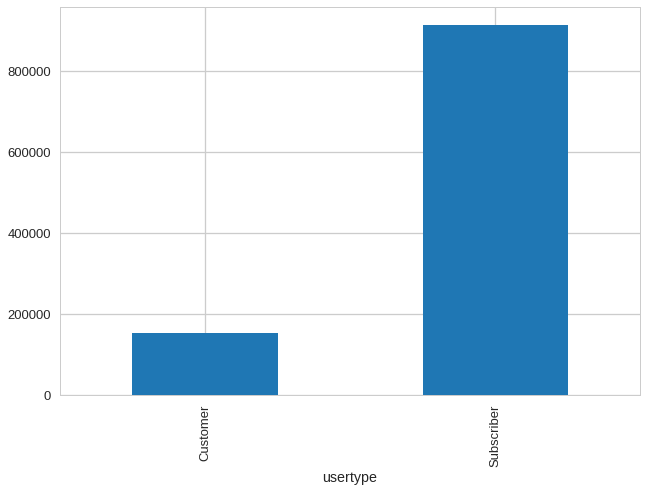

In [ ]:
(data.groupby("usertype")["start station id"].count()).plot.bar()

### Birth Year distribution

In [ ]:
table = pd.pivot_table(data = data, index = 'birth year', values = 'bikeid', aggfunc= 'count')
table

,bikeid
birth year,
1885,19
1886,13
1887,16
1888,73
1889,18
...,...
2000,7609
2001,3977
2002,2063


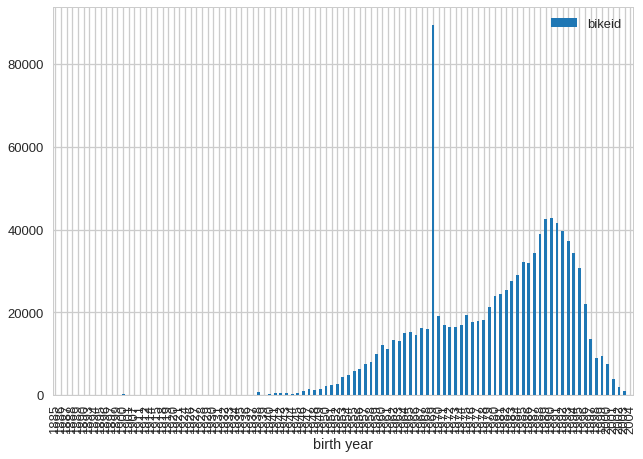

In [ ]:
table.plot(kind='bar')

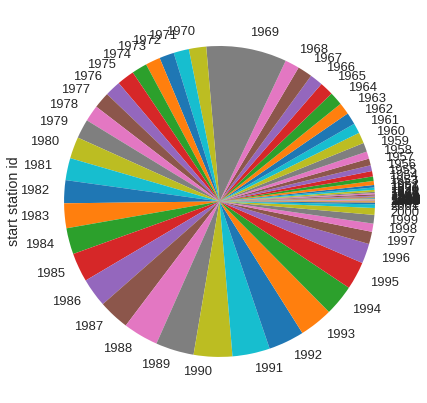

In [ ]:
(data.groupby("birth year")["start station id"].count()).plot.pie()

In [ ]:
data_1945plus = data[data["birth year"] >= 1945]
data_1945plus

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,tripinminutes,tripminutes,starthour,startday,weekday
0,1589,2020-03-01 00:00:03.640,2020-03-01 00:26:32.986,224,Spruce St & Nassau St,40.711464,-74.005524,3574,Prospect Pl & Underhill Ave,40.676969,-73.965790,16214,Subscriber,1980,1,26,26,0,1,6
1,389,2020-03-01 00:00:16.756,2020-03-01 00:06:46.062,293,Lafayette St & E 8 St,40.730207,-73.991026,223,W 13 St & 7 Ave,40.737815,-73.999947,29994,Subscriber,1991,2,6,6,0,1,6
2,614,2020-03-01 00:00:20.058,2020-03-01 00:10:34.220,379,W 31 St & 7 Ave,40.749156,-73.991600,515,W 43 St & 10 Ave,40.760094,-73.994618,39853,Subscriber,1991,1,10,10,0,1,6
3,597,2020-03-01 00:00:24.351,2020-03-01 00:10:22.339,3739,Perry St & Greenwich Ave,40.735918,-74.000939,325,E 19 St & 3 Ave,40.736245,-73.984738,42608,Subscriber,1989,1,9,9,0,1,6
4,1920,2020-03-01 00:00:26.112,2020-03-01 00:32:26.268,236,St Marks Pl & 2 Ave,40.728419,-73.987140,3124,46 Ave & 5 St,40.747310,-73.954510,36288,Subscriber,1993,1,32,32,0,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068452,137,2020-03-31 23:56:06.049,2020-03-31 23:58:23.388,422,W 59 St & 10 Ave,40.770513,-73.988038,3356,Amsterdam Ave & W 66 St,40.774667,-73.984706,18851,Subscriber,1989,2,2,2,23,31,1
1068453,1548,2020-03-31 23:57:27.685,2020-04-01 00:23:16.411,523,W 38 St & 8 Ave,40.754666,-73.991382,442,W 27 St & 7 Ave,40.746647,-73.993915,36539,Subscriber,1993,1,25,25,23,31,1
1068454,308,2020-03-31 23:58:00.269,2020-04-01 00:03:08.950,528,2 Ave & E 31 St,40.742909,-73.977061,487,E 20 St & FDR Drive,40.733143,-73.975739,43023,Subscriber,1982,1,5,5,23,31,1
1068455,872,2020-03-31 23:58:42.901,2020-04-01 00:13:15.586,3043,Lewis Ave & Decatur St,40.681460,-73.934903,3755,DeKalb Ave & Franklin Ave,40.690648,-73.957462,43073,Customer,1990,1,14,14,23,31,1


In [ ]:
table_45plus = pd.pivot_table(data = data_1945plus, index = 'birth year', values = 'bikeid', aggfunc= 'count')
table_45plus

,bikeid
birth year,
1945,562
1946,974
1947,1511
1948,1271
1949,1435
1950,2166
1951,2600
1952,2734
1953,4504


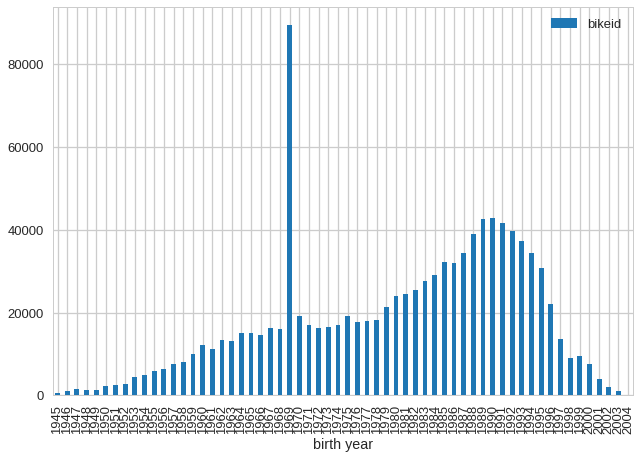

In [ ]:
table_45plus.plot(kind='bar')

### Find the names of the 15 most frequently used start stations.

In [ ]:
data['start station name'].value_counts()[:15]

Pershing Square North            6679
W 21 St & 6 Ave                  6058
West St & Chambers St            5808
E 17 St & Broadway               5585
Broadway & W 60 St               5361
8 Ave & W 31 St                  5287
Broadway & E 22 St               5201
12 Ave & W 40 St                 5029
W 41 St & 8 Ave                  4809
Christopher St & Greenwich St    4786
E 13 St & Avenue A               4767
Broadway & E 14 St               4608
6 Ave & W 33 St                  4569
8 Ave & W 33 St                  4541
Broadway & W 25 St               4429
Name: start station name, dtype: int64

In [ ]:
data['end station name'].value_counts()[:15]

Pershing Square North            6584
E 17 St & Broadway               6179
W 21 St & 6 Ave                  6108
West St & Chambers St            5857
Broadway & E 22 St               5751
8 Ave & W 31 St                  5436
Broadway & W 60 St               5231
12 Ave & W 40 St                 5180
Christopher St & Greenwich St    4849
E 13 St & Avenue A               4827
University Pl & E 14 St          4640
Broadway & E 14 St               4615
Broadway & W 25 St               4528
W 41 St & 8 Ave                  4488
8 Ave & W 33 St                  4463
Name: end station name, dtype: int64

In [ ]:
data_PSN_start  = data[data['start station name'] == "Pershing Square North"]
data_PSN_start

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,tripinminutes,tripminutes,starthour,startday,weekday
179,633,2020-03-01 00:24:37.224,2020-03-01 00:35:10.261,519,Pershing Square North,40.751873,-73.977706,450,W 49 St & 8 Ave,40.762272,-73.987882,40965,Subscriber,1963,1,10,10,0,1,6
351,973,2020-03-01 00:53:08.192,2020-03-01 01:09:21.868,519,Pershing Square North,40.751873,-73.977706,72,W 52 St & 11 Ave,40.767272,-73.993929,28541,Subscriber,1993,1,16,16,0,1,6
828,382,2020-03-01 03:10:34.990,2020-03-01 03:16:57.296,519,Pershing Square North,40.751873,-73.977706,477,W 41 St & 8 Ave,40.756405,-73.990026,35096,Subscriber,1981,1,6,6,3,1,6
1174,402,2020-03-01 07:01:47.620,2020-03-01 07:08:30.527,519,Pershing Square North,40.751873,-73.977706,491,E 24 St & Park Ave S,40.740964,-73.986022,39847,Subscriber,1957,1,6,6,7,1,6
1328,505,2020-03-01 07:33:18.273,2020-03-01 07:41:43.393,519,Pershing Square North,40.751873,-73.977706,3142,1 Ave & E 62 St,40.761227,-73.960940,41378,Subscriber,1977,1,8,8,7,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066546,816,2020-03-31 19:24:06.113,2020-03-31 19:37:42.838,519,Pershing Square North,40.751873,-73.977706,280,E 10 St & 5 Ave,40.733320,-73.995101,39952,Subscriber,1988,1,13,13,19,31,1
1066571,538,2020-03-31 19:25:26.452,2020-03-31 19:34:24.937,519,Pershing Square North,40.751873,-73.977706,2003,1 Ave & E 18 St,40.733812,-73.980544,42973,Subscriber,1995,1,8,8,19,31,1
1066738,953,2020-03-31 19:33:20.920,2020-03-31 19:49:14.697,519,Pershing Square North,40.751873,-73.977706,3435,Grand St & Elizabeth St,40.718822,-73.995960,42023,Subscriber,1986,2,15,15,19,31,1
1068211,782,2020-03-31 22:30:41.656,2020-03-31 22:43:43.854,519,Pershing Square North,40.751873,-73.977706,448,W 37 St & 10 Ave,40.756604,-73.997901,20582,Customer,1988,1,13,13,22,31,1


In [ ]:
data_WSCh_start  = data[data['start station name'] == "West St & Chambers St"]
data_WSCh_start


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,tripinminutes,tripminutes,starthour,startday,weekday
825,1619,2020-03-01 03:09:07.911,2020-03-01 03:36:07.355,426,West St & Chambers St,40.717548,-74.013221,536,1 Ave & E 30 St,40.741444,-73.975361,37191,Subscriber,1999,1,26,26,3,1,6
1171,884,2020-03-01 07:01:11.588,2020-03-01 07:15:55.906,426,West St & Chambers St,40.717548,-74.013221,489,10 Ave & W 28 St,40.750664,-74.001768,27487,Subscriber,1986,1,14,14,7,1,6
1433,391,2020-03-01 07:45:48.371,2020-03-01 07:52:19.757,426,West St & Chambers St,40.717548,-74.013221,3783,Cliff St & Fulton St,40.708380,-74.004950,16100,Subscriber,1963,1,6,6,7,1,6
2109,510,2020-03-01 08:47:26.993,2020-03-01 08:55:57.543,426,West St & Chambers St,40.717548,-74.013221,264,Maiden Ln & Pearl St,40.707065,-74.007319,29114,Subscriber,1978,1,8,8,8,1,6
2964,793,2020-03-01 09:33:12.821,2020-03-01 09:46:26.018,426,West St & Chambers St,40.717548,-74.013221,459,W 20 St & 11 Ave,40.746745,-74.007756,41147,Subscriber,1985,1,13,13,9,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067245,1900,2020-03-31 20:10:14.365,2020-03-31 20:41:54.578,426,West St & Chambers St,40.717548,-74.013221,3301,Columbus Ave & W 95 St,40.791956,-73.968087,37630,Subscriber,1995,1,31,31,20,31,1
1067556,1066,2020-03-31 20:40:24.794,2020-03-31 20:58:11.478,426,West St & Chambers St,40.717548,-74.013221,458,11 Ave & W 27 St,40.751396,-74.005226,33890,Subscriber,1972,2,17,17,20,31,1
1067968,1975,2020-03-31 21:39:16.500,2020-03-31 22:12:11.637,426,West St & Chambers St,40.717548,-74.013221,2003,1 Ave & E 18 St,40.733812,-73.980544,29715,Customer,1993,1,32,32,21,31,1
1067974,1968,2020-03-31 21:39:52.856,2020-03-31 22:12:41.188,426,West St & Chambers St,40.717548,-74.013221,480,W 53 St & 10 Ave,40.766697,-73.990617,32059,Customer,1994,2,32,32,21,31,1


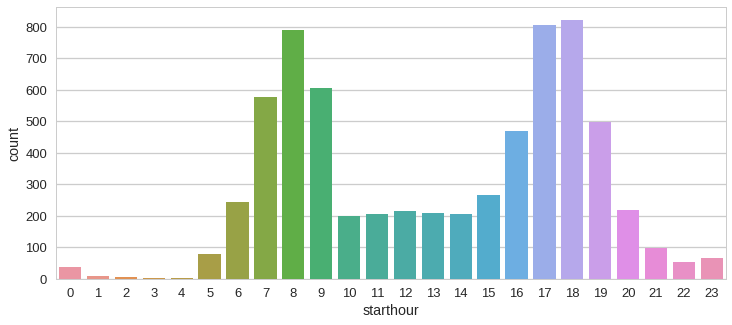

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(data=data_PSN_start, x="starthour")

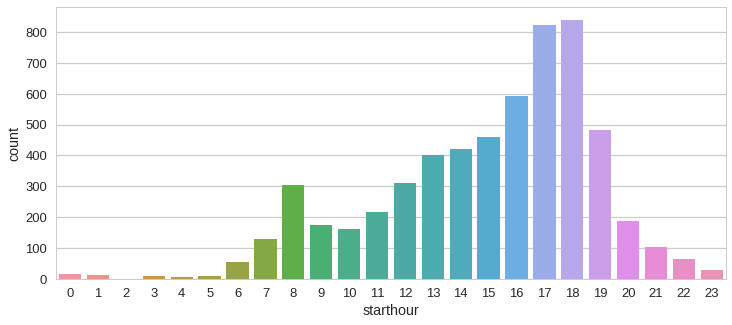

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(data=data_WSCh_start, x="starthour")

### Try to create the NYC map by using the stations' lat,long coordinates

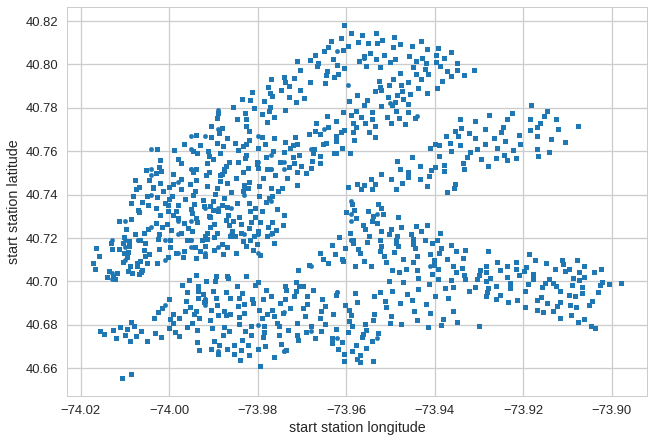

In [ ]:
data.plot(kind='scatter', y='start station latitude', x ='start station longitude')

### TODO: to try at home

* ZIP codes data from Census (we used it in class for the Unemployment data);
* Google maps API (download the map for NYC);
* Other APIs and Map services (specifically for IPython notebooks).

Come up with more questions that you want to try to explore given the CitiBike data.

In [ ]:

shapefiles_zipcodes = "www2.census.gov/geo/tiger/GENZ2017/shp/cb_2017_us_zcta510_500k.zip"

shapefiles_counties = "www2.census.gov/geo/tiger/GENZ2017/shp/cb_2017_us_county_500k.zip"

shapefiles_states   = "www2.census.gov/geo/tiger/GENZ2017/shp/cb_2017_us_state_500k.zip"




In [ ]:
!sudo pip3 install -U -qq geopandas fiona pyproj descartes pysal rtree scipy pykdtree pyepsg pillow OWSLib geoplot


import geopandas as gpd

     |████████████████████████████████| 1.0 MB 5.0 MB/s 
     |████████████████████████████████| 15.4 MB 28.4 MB/s 
     |████████████████████████████████| 6.3 MB 48.7 MB/s 
     |████████████████████████████████| 994 kB 43.6 MB/s 
     |████████████████████████████████| 38.1 MB 1.6 MB/s 
     |████████████████████████████████| 212 kB 57.8 MB/s 
     |████████████████████████████████| 3.1 MB 49.8 MB/s 
     |████████████████████████████████| 216 kB 57.4 MB/s 
     |████████████████████████████████| 2.4 MB 19.3 MB/s 
     |████████████████████████████████| 95 kB 3.7 MB/s 
     |████████████████████████████████| 60 kB 7.1 MB/s 
     |████████████████████████████████| 55 kB 3.5 MB/s 
     |████████████████████████████████| 164 kB 51.1 MB/s 
     |████████████████████████████████| 46 kB 3.8 MB/s 
     |████████████████████████████████| 41 kB 588 kB/s 
     |████████████████████████████████| 209 kB 67.8 MB/s 
     |████████████████████████████████| 5.7 MB 73.7 MB/s 
     |██████████████████

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.0-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [ ]:
df_zipcodes = gpd.read_file("www2.census.gov/geo/tiger/GENZ2017/shp/cb_2017_us_zcta510_500k.zip")

DriverError: ignored

In [ ]:
df_states = gpd.read_file(shapefiles_states)

In [ ]:
df_states.head(3)

In [ ]:
uscities = pd.read_csv("uscities.csv")

In [ ]:
uscities.head(3)

In [ ]:
len(set(uscities))

In [ ]:
df_states.plot(

    figsize=(10,10),

    linewidth=0.2,

    color='white',

    edgecolor='black'

)

plt.scatter(uscities.lng, uscities.lat, marker = "p", c='darkgreen')

plt.show()